## Logistic Regression Problem - Midterm Exam 2/2567

In [61]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# library written for this exercise
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline
import math

In [62]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (m, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = plt.figure()

    # ====================== YOUR CODE HERE ======================
    pos = y == 1
    neg = y == 0

    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    # plt.show()
    
    # ============================================================

In [63]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    g = 1/(1+ np.exp(-z)) #sigmoid function
    

    # =============================================================
    return g

In [64]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    p = np.round(sigmoid(np.dot(X,theta)))
    
    
    # ============================================================
    return p

<blockquote>Train

In [65]:
# Load training data
# The first tenth columns contain features of gamma ray and background hadrons.
# The tenth column contains the label (1 for gamma ray and 0 for background hadrons).

data = np.loadtxt(r'D:\M.eng\Machine learning\midterm_crisis\Data\LogisticRegressionDataTrain.txt')
X, y = data[:, 0:10], data[:, 10]
m, n = X.shape

In [66]:
X

array([[ 96.3809,  23.2359,   3.4737, ...,  18.58  ,   2.072 , 268.105 ],
       [ 59.9928,  34.8365,   3.3439, ...,  15.1518,   5.726 , 282.142 ],
       [ 64.6156,  19.2661,   2.9754, ..., -16.7622,  10.652 , 298.281 ],
       ...,
       [ 47.0181,  16.2809,   3.0941, ...,  -8.6135,   5.59  , 197.979 ],
       [ 22.4007,  12.7727,   2.2529, ...,   9.0781,   1.451 , 163.677 ],
       [129.3089,  60.2415,   3.2452, ..., -37.0573,  22.1024, 355.9589]],
      shape=(16000, 10))

In [67]:
y

array([1., 1., 1., ..., 1., 1., 0.], shape=(16000,))

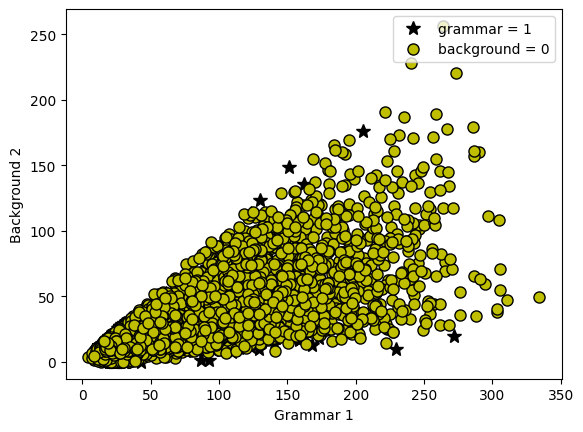

In [68]:
plotData(X, y)
# Labels and Legend
plt.xlabel('Grammar 1')
plt.ylabel('Background 2')

# Specified in plot order
plt.legend(['grammar = 1', 'background = 0'], loc='upper right')
plt.show()

In [69]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = utils.mapFeature(X[:, 0], X[:, 1])

# Cost function and Gradient descent

In [70]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1) #ประกบตาม vector/metrix ตามแนว column ทำให้ขนาดไม่เปลี่ยน

In [71]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    h = sigmoid(np.dot(X,theta))
    J = (1 / m) * (-np.dot(y,np.log(h)) - np.dot((1 - y),np.log(1-h))) #ไม่ต้องมี summation เพราะมัน sum มาแล้ว
    grad = (1 / m) * np.dot((h-y),X)
    
    # =============================================================
    return J, grad

In [72]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta (ones): {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at test theta (ones) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[-0.1461, -0.1461, -1.5455, -0.9151, 648.1305]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta (ones): nan
Expected cost (approx): 3.16

Gradient at test theta (ones) - first five values only:
	[0.3539, 0.3546, 25.1636, 10.2117, 2977.2636]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


C:\Users\panda\AppData\Local\Temp\ipykernel_14120\2141410214.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * (-np.dot(y,np.log(h)) - np.dot((1 - y),np.log(1 - h))) \


In [73]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta (ones): {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at test theta (ones) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[-0.1461, -0.1461, -1.5455, -0.9151, 648.1305]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta (ones): nan
Expected cost (approx): 3.16

Gradient at test theta (ones) - first five values only:
	[0.3539, 0.3546, 25.1636, 10.2117, 2977.2636]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


C:\Users\panda\AppData\Local\Temp\ipykernel_14120\2141410214.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * (-np.dot(y,np.log(h)) - np.dot((1 - y),np.log(1 - h))) \


# Scipy optimal

<blockquote>Test

In [74]:
# Load test data
# The first tenth columns contain features of gamma ray and background hadrons.
# The tenth column contains the label (1 for gamma ray and 0 for background hadrons).

data = np.loadtxt(r'D:\M.eng\Machine learning\midterm_crisis\Data\LogisticRegressionDataTest.txt')
X_test, y_test = data[:, 0:10], data[:, 10]
m_test, n_test = X_test.shape

In [75]:
X_test = X_test[0:3000]

In [76]:
y_test

array([0., 1., 1., ..., 1., 1., 1.], shape=(3000,))

In [77]:
# Number of examples and features in training data and test data
X.shape, X_test.shape

((16000, 29), (3000, 10))

In [78]:
y.shape, y_test.shape

((16000,), (3000,))

In [79]:
X = X_test

In [80]:
y =y_test

ValueError: shapes (1,28) and (10,) not aligned: 28 (dim 1) != 10 (dim 0)

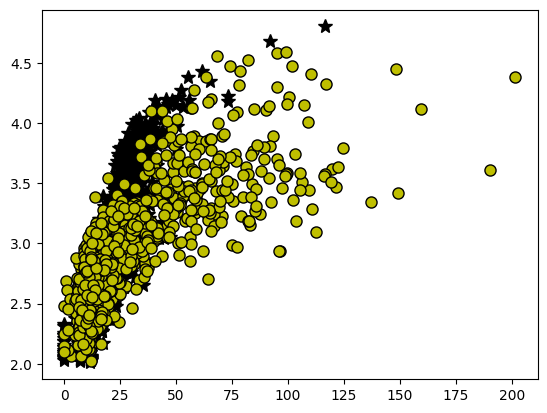

In [81]:
# Initialize fitting parameters

initial_theta = np.zeros(X_test.shape[1])
# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 0.1

# set options for optimize.minimize
options= {'maxfun': 200}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X_test, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

utils.plotDecisionBoundary(plotData, theta, X_test, y)
plt.xlabel('Grammar test')
plt.ylabel('Background test')
plt.legend(['Grammar = 1', 'Background = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % lambda_)

plt.show()

# Compute accuracy on our training set
p = predict(theta, X_test)

print('Train Accuracy with lambda =', lambda_, ': %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 0): 86.4 % (approx)\n')
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')
print('Expected accuracy (with lambda = 100): 61.0 % (approx)\n')

In [82]:
# Classify these 3 examples:
Example1 = [67.5844, 14.7835, 2.7631, 0.3934, 0.1993, 51.7179, 66.5987, -8.2886, 1.0325, 159.286]
Example2 = [24.2515, 9.6208, 2.5641, 0.5648, 0.3179, 27.5263, 20.0094, -7.0592, 60.9102, 89.8197]
Example3 = [53.051, 8.7223, 2.8438, 0.4071, 0.2126, 4.064, 21.3111, -6.1979, 68.4705, 250.0441]

In [83]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

ValueError: shapes (3000,10) and (29,) not aligned: 10 (dim 1) != 29 (dim 0)

# Predict Features

In [ ]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([67.5844, 14.7835, 2.7631, 0.3934, 0.1993, 51.7179, 66.5987, -8.2886, 1.0325, 159.286], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.881
Expected value: 0.775 +/- 0.002



ValueError: shapes (16000,28) and (10,) not aligned: 28 (dim 1) != 10 (dim 0)

## End of Logistic Regression Problem